In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlibpy import linear_regression as lnr
from mlibpy import logistic_regression as logr
from mlibpy import softmax_regression as sftr
from mlibpy.neural_network import *

# Training Dataset

In [2]:
df = pd.read_csv("/datasets/nn_train.csv")
df.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_1017,Feature_1018,Feature_1019,Feature_1020,Feature_1021,Feature_1022,Feature_1023,Feature_1024,binary_label,class_label
0,1,81,109,91,96,107,97,103,95,100,...,114,93,91,98,72,92,78,78,0,5
1,2,168,168,169,169,170,171,172,172,175,...,44,44,44,44,44,44,44,44,0,9
2,3,14,20,32,6,27,6,5,34,15,...,63,64,63,60,54,48,43,41,0,5
3,4,60,109,157,126,82,80,70,58,37,...,105,102,99,98,100,105,111,114,1,8
4,5,63,72,86,75,93,77,75,67,62,...,108,109,102,106,96,91,102,89,0,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Columns: 1027 entries, ID to class_label
dtypes: int64(1027)
memory usage: 626.8 MB


In [6]:
df.describe()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_1017,Feature_1018,Feature_1019,Feature_1020,Feature_1021,Feature_1022,Feature_1023,Feature_1024,binary_label,class_label
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,...,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,40000.500000,115.753888,116.260937,117.575125,118.704962,119.768175,120.737662,121.647437,122.371212,123.09155,...,114.702775,114.104012,113.424738,112.762838,112.026175,111.229250,110.350800,109.893250,0.500000,5.495687
std,23094.155105,69.391587,68.405979,68.002427,67.670320,67.313151,67.060201,66.664825,66.524531,66.34408,...,56.977940,56.907261,57.144592,57.166208,57.359517,57.627811,57.930748,58.802536,0.500003,2.871608
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,20000.750000,58.000000,60.000000,62.000000,63.000000,65.000000,66.000000,67.000000,68.000000,70.00000,...,73.000000,72.000000,71.000000,71.000000,70.000000,69.000000,67.000000,66.000000,0.000000,3.000000
50%,40000.500000,109.000000,110.000000,112.000000,113.000000,114.000000,115.000000,117.000000,117.000000,119.00000,...,112.000000,111.000000,110.000000,109.000000,108.000000,107.000000,106.000000,105.000000,0.500000,5.000000
75%,60000.250000,167.000000,167.000000,168.000000,169.000000,170.000000,170.000000,171.000000,172.000000,172.00000,...,153.000000,152.000000,151.000000,150.000000,150.000000,149.000000,148.000000,148.000000,1.000000,8.000000
max,80000.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,1.000000,10.000000


In [7]:
pd.crosstab(df.iloc[:, 1025], df.iloc[:, 1026])

class_label,1,2,3,4,5,6,7,8,9,10
binary_label,,,,,,,,,,
0,3972,4013,3969,4010,3965,4001,4063,3993,4029,3985
1,4060,3982,4024,4004,4044,3987,4009,3920,3994,3976


## Training

In [8]:
X_train = np.array(df.iloc[:, 1:1025])
X_train, X_mean, X_std = lnr.normalize(X_train)
m, n = np.shape(X_train)
m, n

(80000, 1024)

In [9]:
X_train

array([[-0.49275362, -0.10294118, -0.38235294, ..., -0.33333333,
        -0.56140351, -0.53448276],
       [ 0.76811594,  0.76470588,  0.76470588, ..., -1.1754386 ,
        -1.15789474, -1.12068966],
       [-1.46376812, -1.41176471, -1.25      , ..., -1.10526316,
        -1.1754386 , -1.17241379],
       ...,
       [-1.53623188, -1.13235294, -1.01470588, ..., -1.66666667,
        -1.77192982, -1.46551724],
       [ 0.01449275,  0.94117647,  1.42647059, ..., -0.43859649,
        -0.98245614, -0.55172414],
       [-0.02898551, -0.05882353, -0.04411765, ..., -0.10526316,
         0.19298246,  0.63793103]])

In [10]:
y_bin_train = np.array(df.iloc[:, 1025])
print(np.shape(y_bin_train))
y_bin_train

(80000,)


array([0, 0, 0, ..., 0, 0, 1])

In [11]:
y_class_train = np.array(df.iloc[:, 1026])
print(np.shape(y_class_train))
y_class_train

(80000,)


array([ 5,  9,  5, ...,  2, 10,  1])

## First

In [12]:
w1, b1 = initialize_parameters(X_train, 3, [128, 32, 1])
print(np.shape(w1[0]))
print(np.shape(w1[1]))
print(np.shape(w1[2]))
print(np.shape(b1[0]))
print(np.shape(b1[1]))
print(np.shape(b1[2]))

(1024, 128)
(128, 32)
(32, 1)
(128,)
(32,)
(1,)


In [13]:
T1, Z1 = for_prop(X_train, w1, b1, [relu, relu, sigmoid])
print(len(T1))
print(len(Z1))

3
3


/content/drive/MyDrive/ColabNotebooks/WoC/mlibpy/neural_network.py:40: RuntimeWarning: overflow encountered in exp
  An = 1/(1 + np.exp(A*-1))


In [14]:
j = logr.logistic_cost(y_bin_train, Z1[-1].reshape(m,), 1e-5)
j


3.750012497027139

In [15]:
dw, db = back_prop(X_train, w1, b1, y_bin_train, [relu, relu, sigmoid], T1, Z1)

In [16]:
print(np.shape(dw[0]))
print(np.shape(dw[1]))
print(np.shape(dw[2]))
print(np.shape(db[0]))
print(np.shape(db[1]))
print(np.shape(db[2]))

(1024, 128)
(128, 32)
(32, 1)
(128,)
(32,)
(1,)


In [17]:
n_iter = 50
alpha = 0.9
w1, b1, cost_history = nn_gradient_descent(X_train, w1, b1, y_bin_train, [relu, relu, sigmoid], n_iter, alpha)

Cost at iteration 0: 3.750012497027139
Cost at iteration 5: 0.6935906296067985
Cost at iteration 10: 0.693155441888944
Cost at iteration 15: 0.6931214030068821
Cost at iteration 20: 0.6931187421047469
Cost at iteration 25: 0.6931185341048297
Cost at iteration 30: 0.6931185178457698
Cost at iteration 35: 0.6931185165748271
Cost at iteration 40: 0.6931185164754815
Cost at iteration 45: 0.6931185164677159
Cost at iteration 50: 0.6931185164671436


In [18]:
T1, Z1 = for_prop(X_train, w1, b1, [relu, relu, sigmoid])

In [19]:
logr.bce(y_bin_train, Z1[-1].reshape(m,))

0.5000125

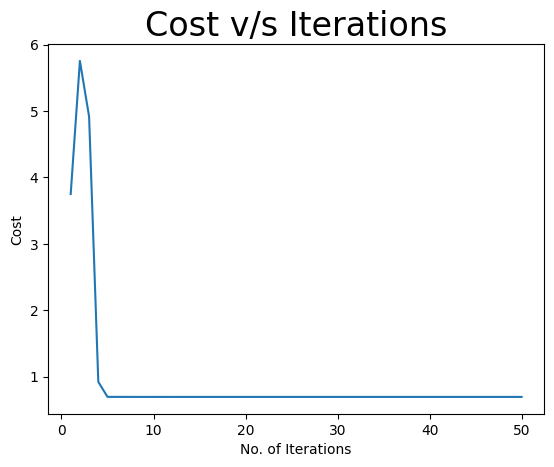

In [20]:
plt.title("Cost v/s Iterations", fontdict = {'fontsize' : 24})
plt.xlabel("No. of Iterations")
plt.ylabel("Cost")

x_axis = list(range(1, n_iter+1))
y_axis = (cost_history)

plt.plot(x_axis, y_axis, '-')

plt.show()

# Testing Dataset

In [21]:
df_test = pd.read_csv("/datasets/nn_test.csv")
df_test.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_1015,Feature_1016,Feature_1017,Feature_1018,Feature_1019,Feature_1020,Feature_1021,Feature_1022,Feature_1023,Feature_1024
0,1,52,36,23,15,10,14,21,20,18,...,34,65,93,81,50,81,120,80,32,30
1,2,118,119,120,121,122,123,124,125,126,...,59,56,54,54,54,53,53,52,52,52
2,3,162,166,171,175,177,179,182,184,181,...,40,39,30,30,31,33,36,40,42,43
3,4,42,38,37,42,51,57,57,55,55,...,31,28,28,26,24,23,23,21,17,14
4,5,59,131,160,129,148,173,140,118,81,...,123,122,121,118,114,112,111,109,107,105


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 1025 entries, ID to Feature_1024
dtypes: int64(1025)
memory usage: 156.4 MB


In [23]:
df_test.describe()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_1015,Feature_1016,Feature_1017,Feature_1018,Feature_1019,Feature_1020,Feature_1021,Feature_1022,Feature_1023,Feature_1024
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,116.481800,116.853650,118.072250,119.213450,120.525500,121.70300,122.683200,123.357900,124.014600,...,115.589400,115.179450,114.785150,114.334400,113.63950,112.938850,112.176050,111.289050,110.533000,110.313350
std,5773.647028,69.308127,68.299257,67.918382,67.316729,66.946292,66.73898,66.315915,66.272073,66.122942,...,56.862135,56.773326,56.762129,56.752848,56.83226,56.817347,57.175619,57.339791,57.724901,58.633879
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.750000,59.000000,61.000000,62.000000,64.000000,66.000000,67.00000,69.000000,70.000000,71.000000,...,74.000000,74.000000,73.000000,73.000000,72.00000,71.000000,70.000000,69.000000,68.000000,67.000000
50%,10000.500000,110.000000,110.000000,112.000000,114.000000,115.000000,116.00000,118.000000,118.000000,119.000000,...,113.000000,112.000000,112.000000,111.000000,111.00000,110.000000,108.000000,107.000000,106.000000,106.000000
75%,15000.250000,168.000000,167.000000,168.000000,169.000000,170.000000,171.00000,172.000000,173.000000,173.000000,...,152.000000,152.000000,152.000000,151.000000,150.00000,149.000000,149.000000,148.000000,148.000000,148.000000
max,20000.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000


In [24]:
X_test = np.array(df_test.iloc[:, 1:])
X_test,_,_ = lnr.normalize(X_test, X_mean, X_std)
m, n = np.shape(X_test)
m, n

(20000, 1024)

In [25]:
T_test, Z_test = for_prop(X_test, w1, b1, [relu, relu, sigmoid])

/content/drive/MyDrive/ColabNotebooks/WoC/mlibpy/neural_network.py:40: RuntimeWarning: overflow encountered in exp
  An = 1/(1 + np.exp(A*-1))


In [26]:
y_bin_test_predict = (Z_test[-1] > 0.5).astype(int)